## Nonlinear curve-fitting example
+ Implementation of curve-fitting in Python.
+ Compare with results of Mathematica for same data sets: see pythonTest.nb.

In [1]:
import scipy as sp
from scipy.optimize import curve_fit

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt

# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

#### Read in data

In [2]:
data = sp.loadtxt("sample2.dat")  # Each line in file corresponds to 
                                  #  single data point: x,y,u
x = data.T[0]                     # The .T gives transpose of array
y = data.T[1]
u = data.T[2]

In [3]:
# More "pythonic" reading of data
# The "unpack = True" reads columns.
x, y, u = sp.loadtxt("sample2.dat", unpack=True)

#### Plot raw data

<IPython.core.display.Javascript object>


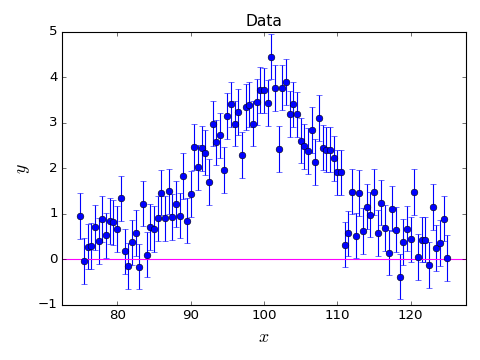

In [4]:
# "quasi-continuous" set of x's for plotting of function:
xfine = sp.linspace(min(x), max(x), 201)  
plt.figure(1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Data')
plt.axhline(0, color='magenta')
# Pad x-range on plot: 
plt.xlim(min(x) - 0.05*(max(x) - min(x)), max(x) + 0.05*(max(x) - min(x)))  
plt.errorbar(x, y, yerr=u, fmt='o');

#### Define function to be fit<br>Determine initial parameters for search

In [5]:
def fun(x, a, b, c, d):
    return a*sp.exp(-(x-b)**2/2/c**2) + d

Initial "guesses" for parameters a,b,c,d

In [6]:
p0 = 3.5, 105., 8, 0.2

<IPython.core.display.Javascript object>


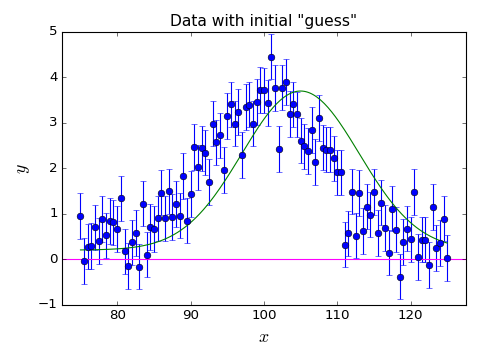

In [7]:
# "quasi-continuous" set of x's for plotting of function:
xfine = sp.linspace(min(x), max(x), 201)  
plt.figure(2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Data with initial "guess"')
plt.axhline(0, color='magenta')
# Pad x-range on plot:
plt.xlim(min(x) - 0.05*(max(x) - min(x)), max(x) + 0.05*(max(x) - min(x)))  
plt.errorbar(x, y, yerr=u, fmt='o')
plt.plot(xfine, fun(xfine, *p0));

#### Fit data<br>Plot fit-function with optimized parameters

In [8]:
popt, pcov = sp.optimize.curve_fit(fun, x, y, p0, sigma=u)

<IPython.core.display.Javascript object>


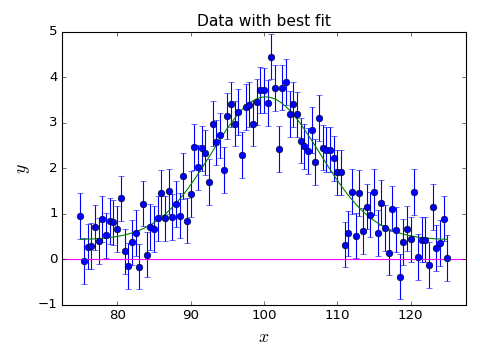

In [9]:
# "quasi-continuous" set of x's for plotting of function:
plt.figure(3)
xfine = sp.linspace(min(x), max(x), 201)  
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Data with best fit')
plt.axhline(0, color='magenta')
# Pad x-range on plot:
plt.xlim(min(x) - 0.05*(max(x) - min(x)), max(x) + 0.05*(max(x) - min(x)))  
plt.errorbar(x, y, yerr=u, fmt='o')
plt.plot(xfine, fun(xfine, *popt));

In [10]:
popt  # Best fit parameters

array([   3.14460892,  100.23117971,    7.38727197,    0.42571678])

In [11]:
pcov # Covariance matrix

array([[  1.67663126e-02,  -1.05668886e-05,   2.26802071e-03,
         -6.49513991e-03],
       [ -1.05668886e-05,   8.90738363e-02,  -4.43390527e-05,
          1.41820927e-05],
       [  2.26802071e-03,  -4.43390527e-05,   1.85823439e-01,
         -2.95868683e-02],
       [ -6.49513991e-03,   1.41820927e-05,  -2.95868683e-02,
          9.05098466e-03]])

In [12]:
for i in range(len(popt)):  
    print("parameter", i,"=", popt[i], "+/-", sp.sqrt(pcov[i,i]))

parameter 0 = 3.14460892047 +/- 0.129484796922
parameter 1 = 100.231179707 +/- 0.298452401994
parameter 2 = 7.38727196673 +/- 0.431072428834
parameter 3 = 0.425716781845 +/- 0.095136663068


For nicer formatting of output, can use features of sympy.<br>
NOTE: Matrix is from sympy; it's not the same as sp.matrix

In [13]:
from sympy import *
from sympy import init_printing
init_printing()

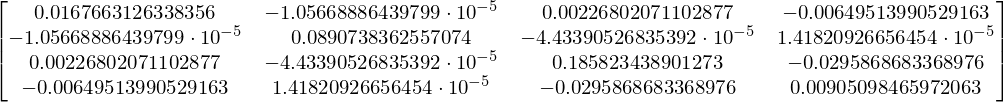

In [14]:
Matrix(pcov)

NOTE:

absolute_sigma=True is equivalent to Mathematica VarianceEstimatorFunction-> (1&).<br>
False gives covariance matrix based on estimated errors in data (weights are just relative).

In [15]:
popt, pcov2 = sp.optimize.curve_fit(fun, x, y, p0, sigma=u, absolute_sigma=True)

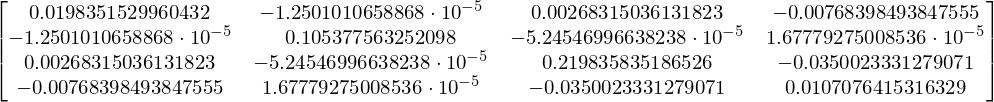

In [16]:
Matrix(pcov2)

<IPython.core.display.Javascript object>


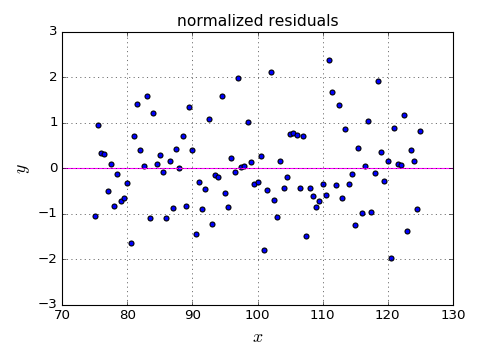

In [17]:
plt.figure(4)
plt.axhline(0, color='magenta')
plt.title('normalized residuals')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.scatter(x, (fun(x, *popt) - y)/u);

Calculation of reduced chi-square parameter:

\begin{equation}
\chi_R^2= \frac{1}{N-c}\times\sum_{i=1}^N \frac{(y_i-f(x_i))^2}{\sigma_i^2}, 
\end{equation}


In [18]:
sp.sum((y - fun(x, *popt))**2/u**2)/(len(data) - 4)

#### Version details

`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on Bucknell linux computers with shared file systems), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line

In [19]:
%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [20]:
%version_information scipy, matplotlib, sympy

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.1.0
OS Linux 3.10.0 327.36.3.el7.x86_64 x86_64 with redhat 7.2 Maipo
scipy 0.19.1
matplotlib 2.0.2
sympy 1.1
Tue Aug 01 11:01:41 2017 EDT